In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

In [29]:
pip install wordcloud

^C
Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
import pandas as pd

In [31]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df.shape

(5572, 5)

In [32]:
df['spam'] = df['v1'].apply(lambda x: 0 if x == "ham" else 1)

In [33]:
df = df.drop(['v1','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [34]:
df.head()

,v2,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [35]:
df.isnull().sum()

v2      0
spam    0
dtype: int64

In [36]:
df.describe(include=object).T

,count,unique,top,freq
v2,5572,5169,"Sorry, I'll call later",30


In [37]:
df.duplicated().sum()

403

In [38]:
df.drop_duplicates(keep='first',inplace=True)

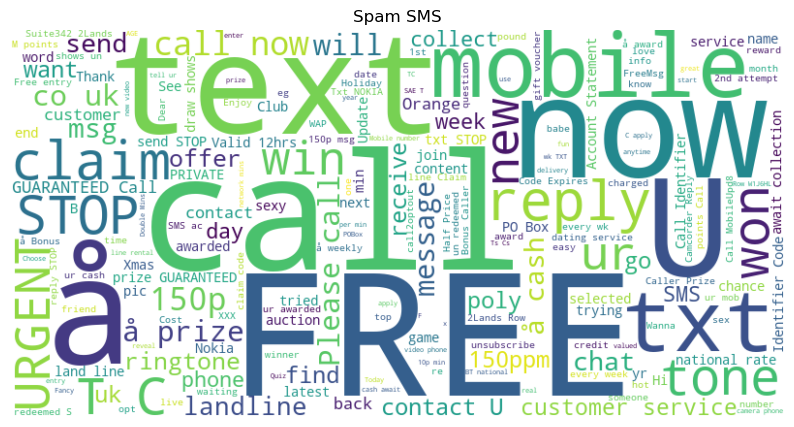

In [39]:
spam_df = df[df['spam'] == 1]
spam_text = ' '.join(spam_df['v2'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam SMS')
plt.show()


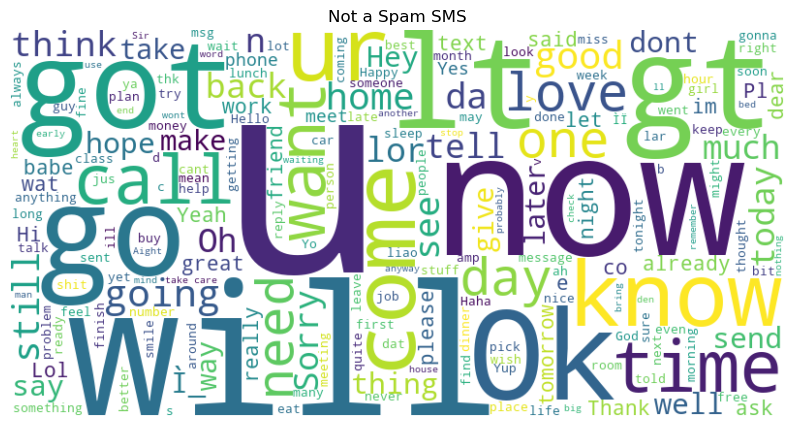

In [40]:
spam_df = df[df['spam'] == 0]
spam_text = ' '.join(spam_df['v2'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Not a Spam SMS')
plt.show()

In [41]:
X , y = df['v2'] ,df['spam']

In [42]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [43]:
print(len(X_train))
print(len(X_test))

4135
1034


In [44]:
vectorizer = TfidfVectorizer(stop_words="english",max_df=0.7)
X_train_vertorized = vectorizer.fit_transform(X_train)
X_test_vertorized = vectorizer.transform(X_test)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [47]:

nb_model = GaussianNB()
lr_model = LogisticRegression()
svm_model = SVC()


In [50]:
X_train_dense = X_train_vertorized.toarray()


In [51]:
nb_model.fit(X_train_dense, y_train)


GaussianNB()

In [23]:
lr_model.fit(X_train_vertorized,y_train)

LogisticRegression()

In [24]:
y_pred = lr_model.predict(X_test_vertorized)
print("accuracy Score: ", accuracy_score(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print()
print("precision score: ", precision_score(y_test, y_pred))

accuracy Score:  0.9642166344294004

confusion matrix: 
[[887   2]
 [ 35 110]]

precision score:  0.9821428571428571


In [25]:
svm_model.fit(X_train_vertorized,y_train)

SVC()

In [26]:
y_pred = svm_model.predict(X_test_vertorized)
print("accuracy Score: ", accuracy_score(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print()
print("precision score: ", precision_score(y_test, y_pred))

accuracy Score:  0.9787234042553191

confusion matrix: 
[[888   1]
 [ 21 124]]

precision score:  0.992


In [53]:
y_pred = nb_model.predict(X_test_vertorized.toarray())
print("accuracy Score: ", accuracy_score(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print()
print("precision score: ", precision_score(y_test, y_pred))

accuracy Score:  0.8781431334622823

confusion matrix: 
[[786 103]
 [ 23 122]]

precision score:  0.5422222222222223
